<a href="https://colab.research.google.com/github/Carmodann1311/mineria-de-datos/blob/main/Tarea_machine_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Precisión del modelo: 1.0

Reporte de clasificación:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1844

    accuracy                           1.00      1844
   macro avg       1.00      1.00      1.00      1844
weighted avg       1.00      1.00      1.00      1844



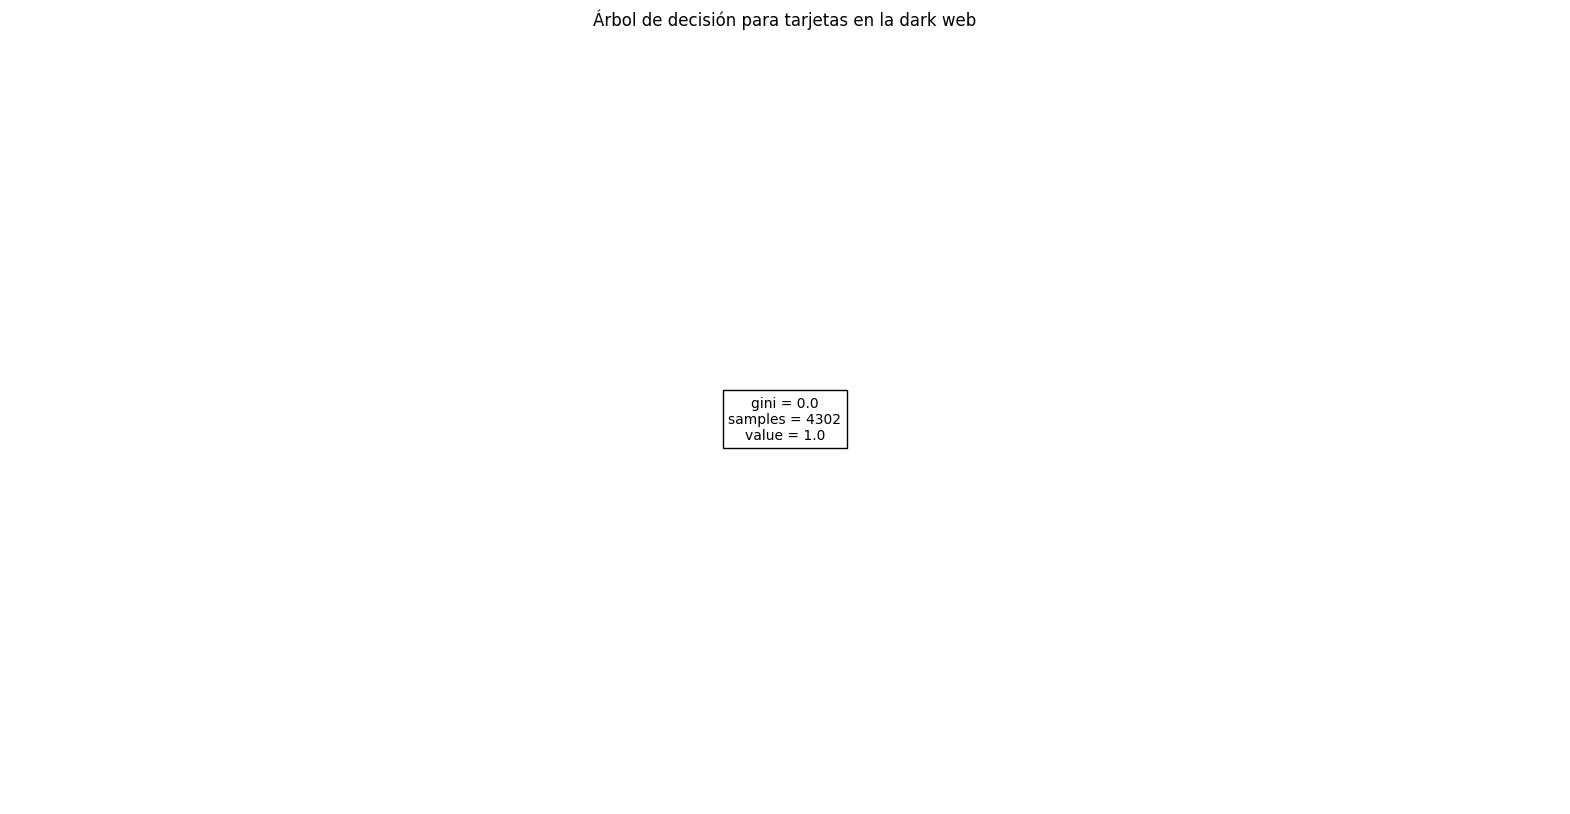

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt

# Cargar el archivo CSV
data = pd.read_csv("/content/cards_data.csv")

# Preprocesamiento: convertir "credit_limit" a valores numéricos eliminando "$" y comas
data['credit_limit'] = data['credit_limit'].replace('[\$,]', '', regex=True).astype(float)

# Convertir variables categóricas a numéricas
data['has_chip'] = data['has_chip'].map({'YES': 1, 'NO': 0})
data['card_on_dark_web'] = data['card_on_dark_web'].map({'Yes': 1, 'No': 0})

# Seleccionar características relevantes y la variable objetivo
features = ['card_brand', 'card_type', 'has_chip', 'num_cards_issued', 'credit_limit', 'year_pin_last_changed']
data_encoded = pd.get_dummies(data[features], drop_first=True)  # Codificación one-hot
X = data_encoded
y = data['card_on_dark_web']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Entrenar un árbol de decisión
tree_clf = DecisionTreeClassifier(max_depth=5, random_state=42)
tree_clf.fit(X_train, y_train)

# Predicciones y evaluación
y_pred = tree_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Precisión del modelo:", accuracy)
print("\nReporte de clasificación:\n", report)

# Visualización del árbol de decisión
plt.figure(figsize=(20, 10))
plot_tree(tree_clf, feature_names=X.columns, class_names=["No", "Yes"], filled=True, fontsize=10)
plt.title("Árbol de decisión para tarjetas en la dark web")
plt.show()
